# Introduction à la classification binaire. Application au diagnostic du cancer du sein

## Importation des librairies Python nécessaires à la résolution du problème

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.metrics import roc_curve,confusion_matrix, accuracy_score,roc_auc_score,classification_report,precision_recall_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from ipywidgets import *
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

In [2]:
X, y = load_breast_cancer(return_X_y=True)
breast_cancer_dataset = load_breast_cancer()

In [3]:
print(breast_cancer_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
pd.set_option('display.max_columns', None)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df['diagnosis'] = breast_cancer_dataset.target

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X = pd.DataFrame(df.drop(["diagnosis"],1)).to_numpy()
df['diagnosis'] = np.where(df['diagnosis'] > 0, 0, 1)
y = df['diagnosis']
y = y.to_numpy()

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_9228/4155448228.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = pd.DataFrame(df.drop(["diagnosis"],1)).to_numpy()


# Chargement des données du Breast Cancer Wisconsin (diagnostic) Dataset

### Visualisation de la structiure des données 

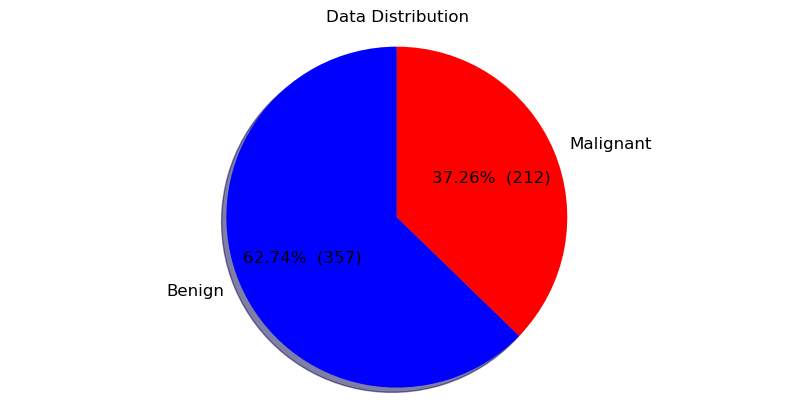

In [8]:
diagnosis = df['diagnosis'].value_counts()
diagnosis_label = "Benign", "Malignant"
diagnosis_size = diagnosis.values
colors = ['red', 'blue']
sizes = [diagnosis_size[0],diagnosis_size[1]]
plt.figure(6,figsize=(10,5), dpi=100)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(sizes,colors=['blue','red'],textprops={'fontsize': 12},autopct=make_autopct(sizes), labels=diagnosis_label,
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Data Distribution')
plt.show()

# La distribution des données 

0    357
1    212
Name: diagnosis, dtype: int64


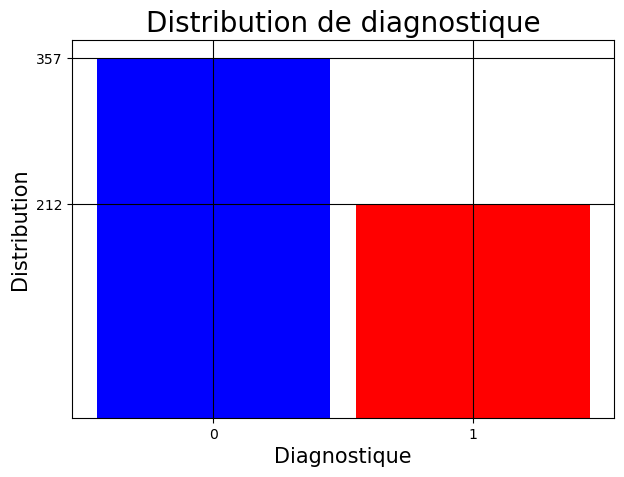

In [9]:
plt.figure(5,figsize=(7,5), dpi=100)
x=df["diagnosis"].value_counts().index
y1=df["diagnosis"].value_counts()
plt.bar(x,y1,color=["blue","red"],width=0.9)
print(df["diagnosis"].value_counts())
plt.xlabel("Diagnostique",color="black",fontsize=15)
plt.ylabel("Distribution",color="black",fontsize=15)
plt.title("Distribution de diagnostique",color="black",fontsize=20)
plt.yticks(ticks=[df["diagnosis"].value_counts()[0],df["diagnosis"].value_counts()[1]])
plt.xticks([0,1])
plt.grid(True,color='black')
plt.show()

### Visualisation de la disparité des  valeurs

In [10]:
df_m = df[df['diagnosis'] == 1]
df_m = df_m.drop(['diagnosis'],1)
df_b = df[df['diagnosis'] == 0]
df_b = df_b.drop(['diagnosis'],1)

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_9228/1584678646.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_m = df_m.drop(['diagnosis'],1)
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_9228/1584678646.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_b = df_b.drop(['diagnosis'],1)


In [11]:
def plotscatter(area):
    plt.figure(1,figsize=(7,5), dpi=100)
    plt.title(f"Breast Cancer Wisconsin ({area})")
    plt.scatter(df_b.index, df_b[area], c ='Red', label='Benign', marker='+')
    plt.scatter(df_m.index, df_m[area], c= 'blue', alpha=0.6, label='Malignant')
    plt.xlabel('Index')
    plt.ylabel('Y',rotation=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(False)
    plt.show()
    return

In [12]:
interact(plotscatter,area=list(df_b.columns))

interactive(children=(Dropdown(description='area', options=('mean radius', 'mean texture', 'mean perimeter', '…

<function __main__.plotscatter(area)>

In [13]:
def plothist(area, bins):
    plt.figure(1,figsize=(7,5), dpi=100)
    plt.title(f"Breast Cancer Wisconsin ({area})")
    plt.hist(df_b[area], alpha=0.5, color='blue', bins=bins, label='Benign')
    plt.hist(df_m[area], alpha=0.5, color='red', bins=bins, label='Malignant')
    plt.xlabel('Values')
    plt.ylabel('Y',rotation=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(False)
    plt.show()
    return

In [14]:
interact(plothist,area=list(df_b.columns), bins=(4,40,4))

interactive(children=(Dropdown(description='area', options=('mean radius', 'mean texture', 'mean perimeter', '…

<function __main__.plothist(area, bins)>

### La matrice de correlation 

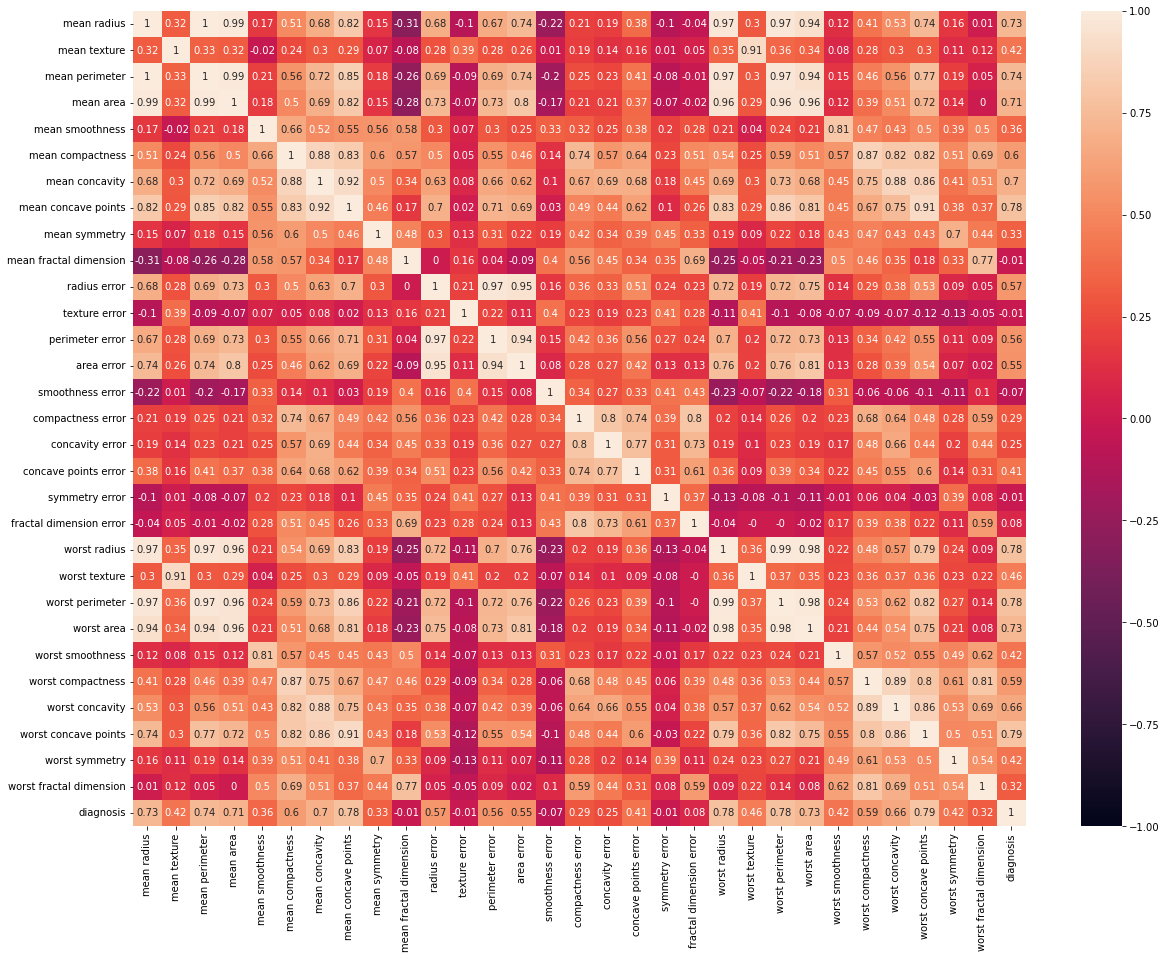

In [15]:
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

### Echantillonnage des données

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=113, random_state=10000, stratify=y)

In [17]:
X_test.shape

(113, 30)

# Affichage sous forme d'histogrammes la distribution du jeu de données initial, du jeu de train et du jeu de test

In [18]:
class benigne_maline():
    def benigne(y):
        b0 = []
        for i in range(len(y)):
            if y[i] == 0:
                b0.append(y[i])
        return b0 
    def maline(y):
        b1 = []
        for i in range(len(y)):
            if y[i] == 1:
                b1.append(y[i])
        return b1

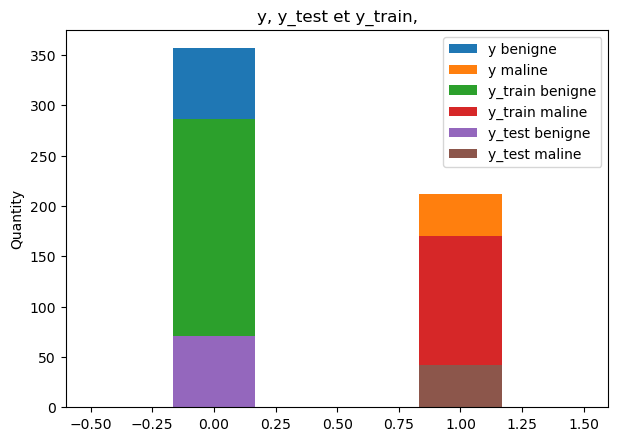

In [19]:
plt.figure(1,figsize=(7,5), dpi=100)
plt.title(f"y, y_test et y_train,")

plt.hist(benigne_maline.benigne(y), bins = 3, label='y benigne')
plt.hist(benigne_maline.maline(y), bins = 3, label='y maline')
plt.hist(benigne_maline.benigne(y_train), bins = 3, label='y_train benigne')
plt.hist(benigne_maline.maline(y_train), bins = 3, label='y_train maline')
plt.hist(benigne_maline.benigne(y_test), bins = 3, label='y_test benigne')
plt.hist(benigne_maline.maline(y_test), bins = 3, label='y_test maline')

plt.xlabel('')
plt.ylabel('Quantity',rotation=90)
plt.legend(loc='upper right')

plt.grid(False)
plt.show()

### Standardisation des données  (Feature Scaling)

In [20]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

### Entrainement du modele 

In [21]:
model = LogisticRegression(C = 0.1, max_iter = 10000)

In [22]:
model.fit(scaled_X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

## Train Data

### La Matrice de confusion Train

In [23]:
y_predict_train = model.predict(scaled_X_train)

<AxesSubplot:>

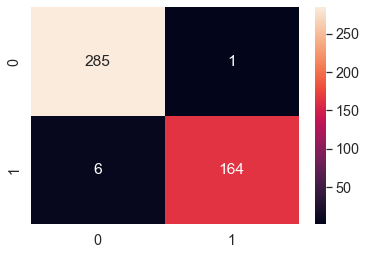

In [24]:
sns.set(font_scale=1.3)
sns.heatmap(confusion_matrix(y_train,y_predict_train), annot=True, fmt='g')

### Accurarcy Score Train

In [25]:
model.score(scaled_X_train, y_train)

0.9846491228070176

### Precision Recall et F1-Score Train

In [26]:
print(classification_report(y_train,y_predict_train))
standart_report_train = classification_report(y_train,y_predict_train, output_dict=True)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       286
           1       0.99      0.96      0.98       170

    accuracy                           0.98       456
   macro avg       0.99      0.98      0.98       456
weighted avg       0.98      0.98      0.98       456



### ROC et AUC Train

0.9962361168243521


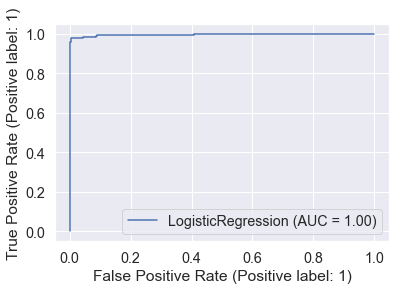

In [27]:
metrics.plot_roc_curve(model, scaled_X_train, y_train,
                               drop_intermediate=True, response_method='auto',
                               name=None, ax=None, pos_label=None,)
y_pred_proba_train = model.predict_proba(scaled_X_train)[::,1]
auc = metrics.roc_auc_score(y_train, y_pred_proba_train)
print(auc)

## Test Data

In [28]:
y_predict_test = model.predict(scaled_X_test)

<AxesSubplot:>

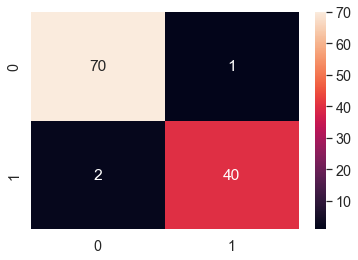

In [29]:
sns.heatmap(confusion_matrix(y_test,y_predict_test), annot=True)

### Accurarcy Score Test

In [30]:
model.score(scaled_X_test, y_test)

0.9734513274336283

### Precision Recall et F1-Score Test

In [31]:
print(classification_report(y_test,y_predict_test))
standart_report_test = classification_report(y_test,y_predict_test, output_dict=True)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        42

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



### ROC et AUC Test

0.9966465459423206


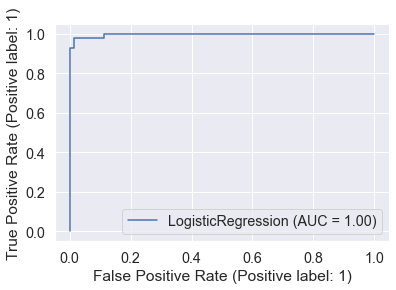

In [32]:
metrics.plot_roc_curve(model, scaled_X_test, y_test,
                               drop_intermediate=True, response_method='auto',
                               name=None, ax=None, pos_label=None,)
y_pred_proba_test = model.predict_proba(scaled_X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba_test)
print(auc)

## Threshold changement 

### Methode 1

In [33]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)
            return y_pred_with_threshold
        
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores)

        optimal_idx = np.argmax(tpr - fpr)
        
        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]
    

In [34]:
model_threshold = LogisticRegressionWithThreshold()
model_threshold.fit(scaled_X_train, y_train)

threshold, tpr_minus_fpr = model_threshold.threshold_from_optimal_tpr_minus_fpr(scaled_X_train, y_train)
y_predict_train_thr = model_threshold.predict(scaled_X_train,threshold)
threshold, tpr_minus_fpr

(0.5621470836928093, 0.9729740847387905)

<AxesSubplot:>

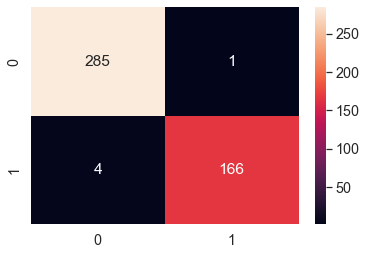

In [35]:
sns.heatmap(confusion_matrix(y_train,y_predict_train_thr), annot=True, fmt='g')

<AxesSubplot:>

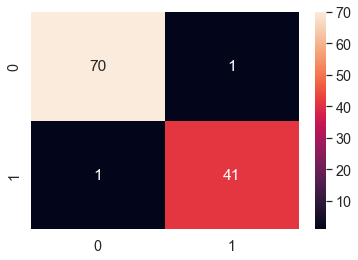

In [36]:
threshold, tpr_minus_fpr = model_threshold.threshold_from_optimal_tpr_minus_fpr(scaled_X_test, y_test)
y_predict_test_thr = model_threshold.predict(scaled_X_test,threshold)
sns.heatmap(confusion_matrix(y_test,y_predict_test_thr), annot=True, fmt='g')

### Methode 2

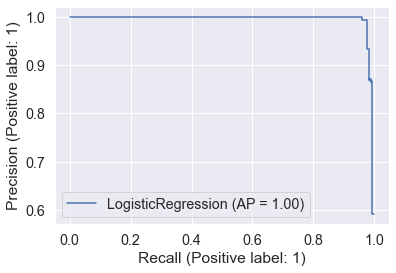

In [37]:
metrics.plot_precision_recall_curve(model, scaled_X_train, y_train, sample_weight=None, response_method='auto', 
                                    name=None, ax=None, pos_label=None)

Maximum accuracy = 0.9823008849557522
Threshold = 0.3226452905811623


<AxesSubplot:>

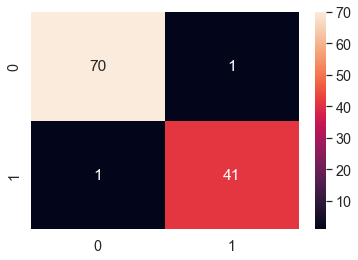

In [42]:
y_predict_proba_test = pd.DataFrame(model.predict_proba(scaled_X_test))
threshold_list = np.linspace(0.0, 1.0, num=500)
test_accuracy ,c_matrix_test, threshold = [], [], []

for i in threshold_list:
    y_predict_test = y_predict_proba_test.applymap(lambda x: 1 if x>i else 0)
    test_accuracy.append(metrics.accuracy_score(y_test.reshape(y_test.size,1),
                y_predict_test.iloc[:,1].to_numpy().reshape(y_predict_test.iloc[:,1].size,1)))
    
    threshold.append(i)
    c_matrix_test.append(confusion_matrix(y_test.reshape(y_test.size,1),
                y_predict_test.iloc[:,1].to_numpy().reshape(y_predict_test.iloc[:,1].to_numpy().size,1)))
    
max_accuracy = max(test_accuracy)
max_index = test_accuracy.index(max_accuracy)
print(f'Maximum accuracy = {max_accuracy}')
print(f'Threshold = {threshold[max_index]}')
sns.heatmap(c_matrix_test[max_index], annot=True, fmt='g')

Maximum accuracy = 0.9890350877192983
Threshold = 0.41482965931863724


<AxesSubplot:>

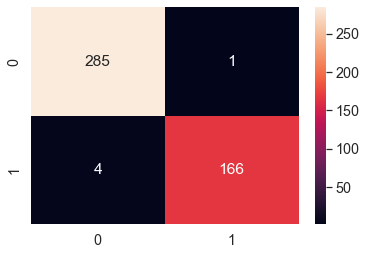

In [45]:
y_predict_proba_train = pd.DataFrame(model.predict_proba(scaled_X_train))
threshold_list = np.linspace(0.0, 1.0, num=500)
train_accuracy ,c_matrix_train, threshold = [], [], []

for i in threshold_list:
    y_predict_train = y_predict_proba_train.applymap(lambda x: 1 if x>i else 0)
    train_accuracy.append(metrics.accuracy_score(y_train.reshape(y_train.size,1),
                y_predict_train.iloc[:,1].to_numpy().reshape(y_predict_train.iloc[:,1].size,1)))
    
    threshold.append(i)
    c_matrix_train.append(confusion_matrix(y_train.reshape(y_train.size,1),
                y_predict_train.iloc[:,1].to_numpy().reshape(y_predict_train.iloc[:,1].to_numpy().size,1)))
    
max_accuracy = max(train_accuracy)
max_index = train_accuracy.index(max_accuracy)
print(f'Maximum accuracy = {max_accuracy}')
print(f'Threshold = {threshold[max_index]}')
sns.heatmap(c_matrix_train[max_index], annot=True, fmt='g')